In [160]:
import requests
import re
from bs4 import BeautifulSoup
from multiprocessing import  Process
import os
import time
from IPython.display import Image as Image

In [161]:
category = ['bangumi', 'guochan', 'guochuang', 'documentary', 'douga', 'music', 'dance', 'game', 'technology', 'digital', 'life', 'food', 'animal', 'kichiku', 'fashion', 'ent', 'cinephile', 'movie', 'tv', 'origin', 'rookie']
base_url = 'https://www.bilibili.com/v/popular/rank/'

In [162]:
url = base_url + category[10]
head = {}
head['User-Agent'] = 'Mozilla/5.0 (Linux; Android 4.0.4; Galaxy Nexus Build/IMM76B) AppleWebKit/535.19 (KHTML, like Gecko) Chrome/18.0.1025.133 Mobile Safari/535.19'

In [163]:
req = requests.get(url,headers=head)
req.encoding = 'utf-8'
html = req.text
bs = BeautifulSoup(html,'lxml')

In [164]:
numList = [1,2,3,1,2,4]
for i in numList:
    if numList.count(i) > 1:
        numList.remove(i)
print(numList)

[3, 1, 2, 4]


In [165]:
detail = bs.find_all(class_ = 'detail')
play_class, view_class, author_class = 'b-icon play', 'b-icon view', 'b-icon author'
de = re.compile('\s{1,}([^\s]{1,})\\n')
a, b, c= de.findall(detail[0].text)
a

'186.5万'

In [166]:
item = bs.find_all(href = re.compile('<*[AB]V\w{9,10}'), class_='title')
re_detail = re.compile('\s{1,}([^\s]{1,})\\n')
detail = bs.find_all(class_ = 'detail')
for i, (video, info) in enumerate(zip(item, detail)):
    play, chat, author = de.findall(info.text)
    print(i+1, video['href'][2:], video.text, play, chat, author)

1 www.bilibili.com/video/BV1DX4y1G7h7 史上最贵企划！66W日元清空最贵扭蛋机！究竟能中多少大奖呢！ 186.5万 4.1万 飞社长
2 www.bilibili.com/video/BV1F54y1e7xd 读个评论儿 123.4万 7724 徐大虾咯
3 www.bilibili.com/video/BV1xK4y1S7ML 擦擦擦擦出的画，一个多月涨粉近30w. 感谢大家的支持！ 138.4万 1507 画渣不渣-HZ创意
4 www.bilibili.com/video/BV1454y1h7Ff 我买了一台剪娃娃机 114.2万 5231 贤宝宝Baby
5 www.bilibili.com/video/BV1ei4y1N7fA 视！角！姬！哥！哥！ 97.2万 6441 ★⑥檤轮囬★
6 www.bilibili.com/video/BV1TV411v7Ng 灵 魂 拷 问 78.8万 9840 十二礼
7 www.bilibili.com/video/BV1Ri4y1T7pt 翔 粉 大 作 战 55.1万 3213 拜托了小翔哥
8 www.bilibili.com/video/BV1Jy4y177rJ 【朱一旦】超级富豪 流落荒岛 一旦流浪 乘风破浪 69.5万 1420 朱一旦的枯燥生活
9 www.bilibili.com/video/BV1GK4y1D73X 66平英国学生公寓大公开！独居月租1w+市中心豪宅 一人一猫 55.9万 7001 假美食po主
10 www.bilibili.com/video/BV1QU4y1H7j7 包场北京周边神秘无人机场！up主看四下无人竟做出这些事情 69.2万 1.7万 终极小腾
11 www.bilibili.com/video/BV1H5411N7Z2 老妈嘴里的还有一个小时吃饭 93.2万 2752 自来卷三木
12 www.bilibili.com/video/BV1Qp4y1n7vg 朕的后宫 怎能容下你这样的女人！ 78.7万 1832 姚姚不是P30
13 www.bilibili.com/video/BV1DK4y1E7YR 强迫别人叫爸爸违法吗 228.2万 1130 寂照庵
14 www.bilibili.com/video/BV1bN41197iC

In [167]:
head = {
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
    'accept-encoding': 'gzip, deflate, br',
    'cookie': 'finger=158939783; buvid3=A3149F96-41C1-BA6A-353B-00D72BDD8D6F73922infoc; CURRENT_FNVAL=80; bsource=search_baidu; _uuid=5A9AD8BA-82CE-580D-D617-C74454283F4F75138infoc; blackside_state=1; sid=966rw8ka; PVID=1; finger=158939783',
    'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.190 Safari/537.36'
}
BVurl = 'https://www.bilibili.com/video/BV1Er4y1A712'
BVreq = requests.get(BVurl,headers=head)
BVreq.encoding = 'utf-8'
BVhtml = BVreq.text
BVbs = BeautifulSoup(html,'lxml')

In [171]:
import json
#dict(spr[-6].text)
rank_page = spr[-6].text
void_front = len('window.__INITIAL_STATE__={"rankList":')
str_end = ',"rankNote"'
#spr[-6].text[void_front:1000]
void_end=rank_page.find(str_end, 0, len(rank_page))
usefulrank=rank_page[void_front: void_end]
usefulrank = usefulrank.replace('false', '"false"')
usefulrank[900:1000]

'，飞，9000，清，速来","cid":303609412,"dimension":{"width":1920,"height":1080,"rotate":0},"bvid":"BV1DX4y1G7'

In [172]:
ranklist = eval(usefulrank)
ranklist[9]

{'aid': 671911818,
 'videos': 1,
 'tid': 176,
 'tname': '汽车',
 'copyright': 1,
 'pic': 'http://i0.hdslb.com/bfs/archive/50ce4da06f14eed3f898b2d4b912b29390ea6d5c.jpg',
 'title': '包场北京周边神秘无人机场！up主看四下无人竟做出这些事情',
 'pubdate': 1614333607,
 'ctime': 1614331997,
 'desc': '包下无人机场，在不限速机场跑道体验沃尔沃的神秘动力！\n开年大吉！各位元宵节快乐，希望你新年心想事成，新年咱一起变得更好，视频我会多多更新！',
 'state': 0,
 'duration': 530,
 'mission_id': 16085,
 'rights': {'bp': 0,
  'elec': 0,
  'download': 0,
  'movie': 0,
  'pay': 0,
  'hd5': 0,
  'no_reprint': 1,
  'autoplay': 1,
  'ugc_pay': 0,
  'is_cooperation': 0,
  'ugc_pay_preview': 0,
  'no_background': 0},
 'owner': {'mid': 394609671,
  'name': '终极小腾',
  'face': 'http://i0.hdslb.com/bfs/face/4f408c5bab24eaa365610e1638f65e9272f4cf52.jpg'},
 'stat': {'aid': 671911818,
  'view': 691522,
  'danmaku': 16987,
  'reply': 1282,
  'favorite': 4777,
  'coin': 24236,
  'share': 903,
  'now_rank': 0,
  'his_rank': 66,
  'like': 86479,
  'dislike': 0},
 'dynamic': '开年大吉！望你新年心想事成，新年一起变得更好！点赞超过12.3万自驾系列接着安排！',
 

103


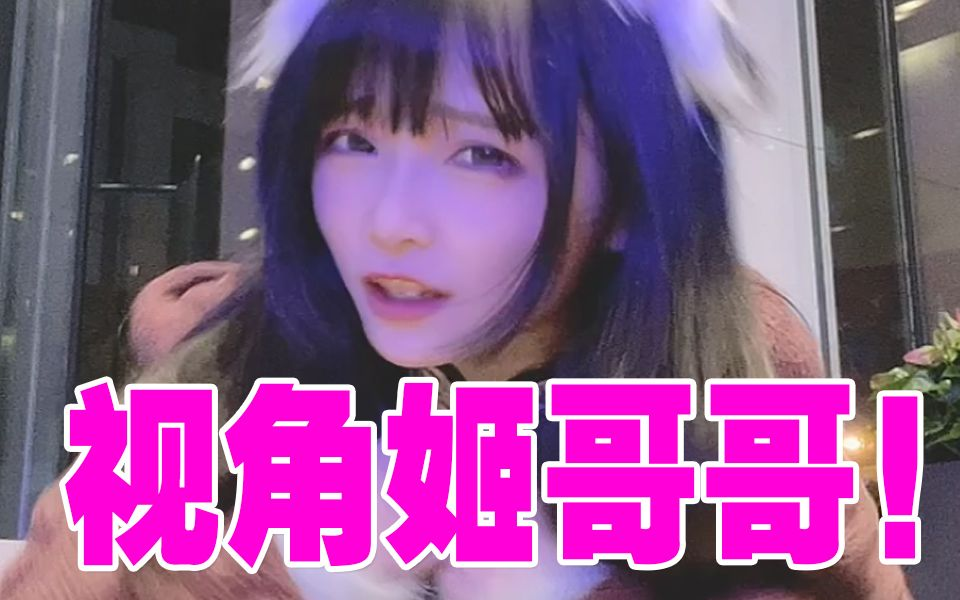

In [170]:
spr = bs.find_all('script')
findjpg = re.compile(r'"pic":"(http:\\u00[\w]F\\u00[\w]Fi[\w].hdslb.com\\u00[\w]Fbfs\\u00[\w]Farchive\\u00[\w]F\w{40}.jpg)')
tempjpg = findjpg.findall(spr[-6].text)
jpg_url = [re.sub(r'\\u00[\d]F','/',onejpg) for onejpg in tempjpg]
print(len(jpg_url))
#保存图片-测试
path = "D://abc.jpg"
jj_url = jpg_url[4]
r = requests.get(jj_url)
with open(path, "wb") as f:
    f.write(r.content)
f.close
display(Image(path))